# Importing libraries

In [37]:
#Importing basic libraries

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

# Loading the data

The dataset we're going to use can be downloaded from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount. Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [3]:
#Load the dataset

dataset = pd.read_csv("creditcard.csv")

# Exploration

In [40]:
dataset.shape

(284807, 31)

In [41]:
dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [42]:
dataset.isnull().sum()

scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

In [44]:
dataset.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,2.913952e-17,-3.065637e-16,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,...,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,0.001727
std,1.000002e+00,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-3.532294e-01,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-3.308401e-01,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,-2.652715e-01,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,-4.471707e-02,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,1.023622e+02,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


# Let's have a more graphical representation:

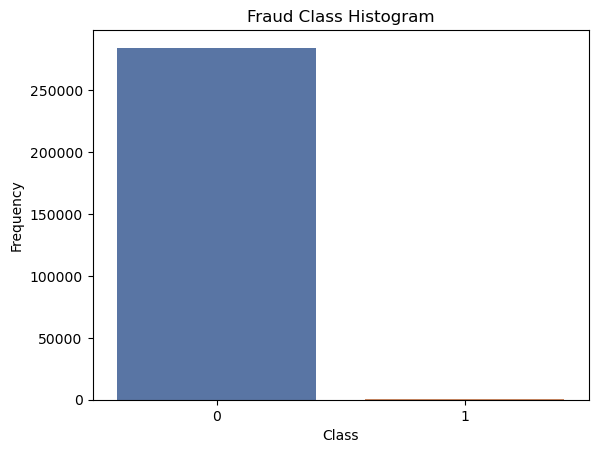

In [45]:
# Data Visualisation

sns.countplot(x="Class", data=dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

array([[<Axes: title={'center': 'scaled_amount'}>,
        <Axes: title={'center': 'scaled_time'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>],
       [<Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>,
        <Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>],
       [<Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: ti

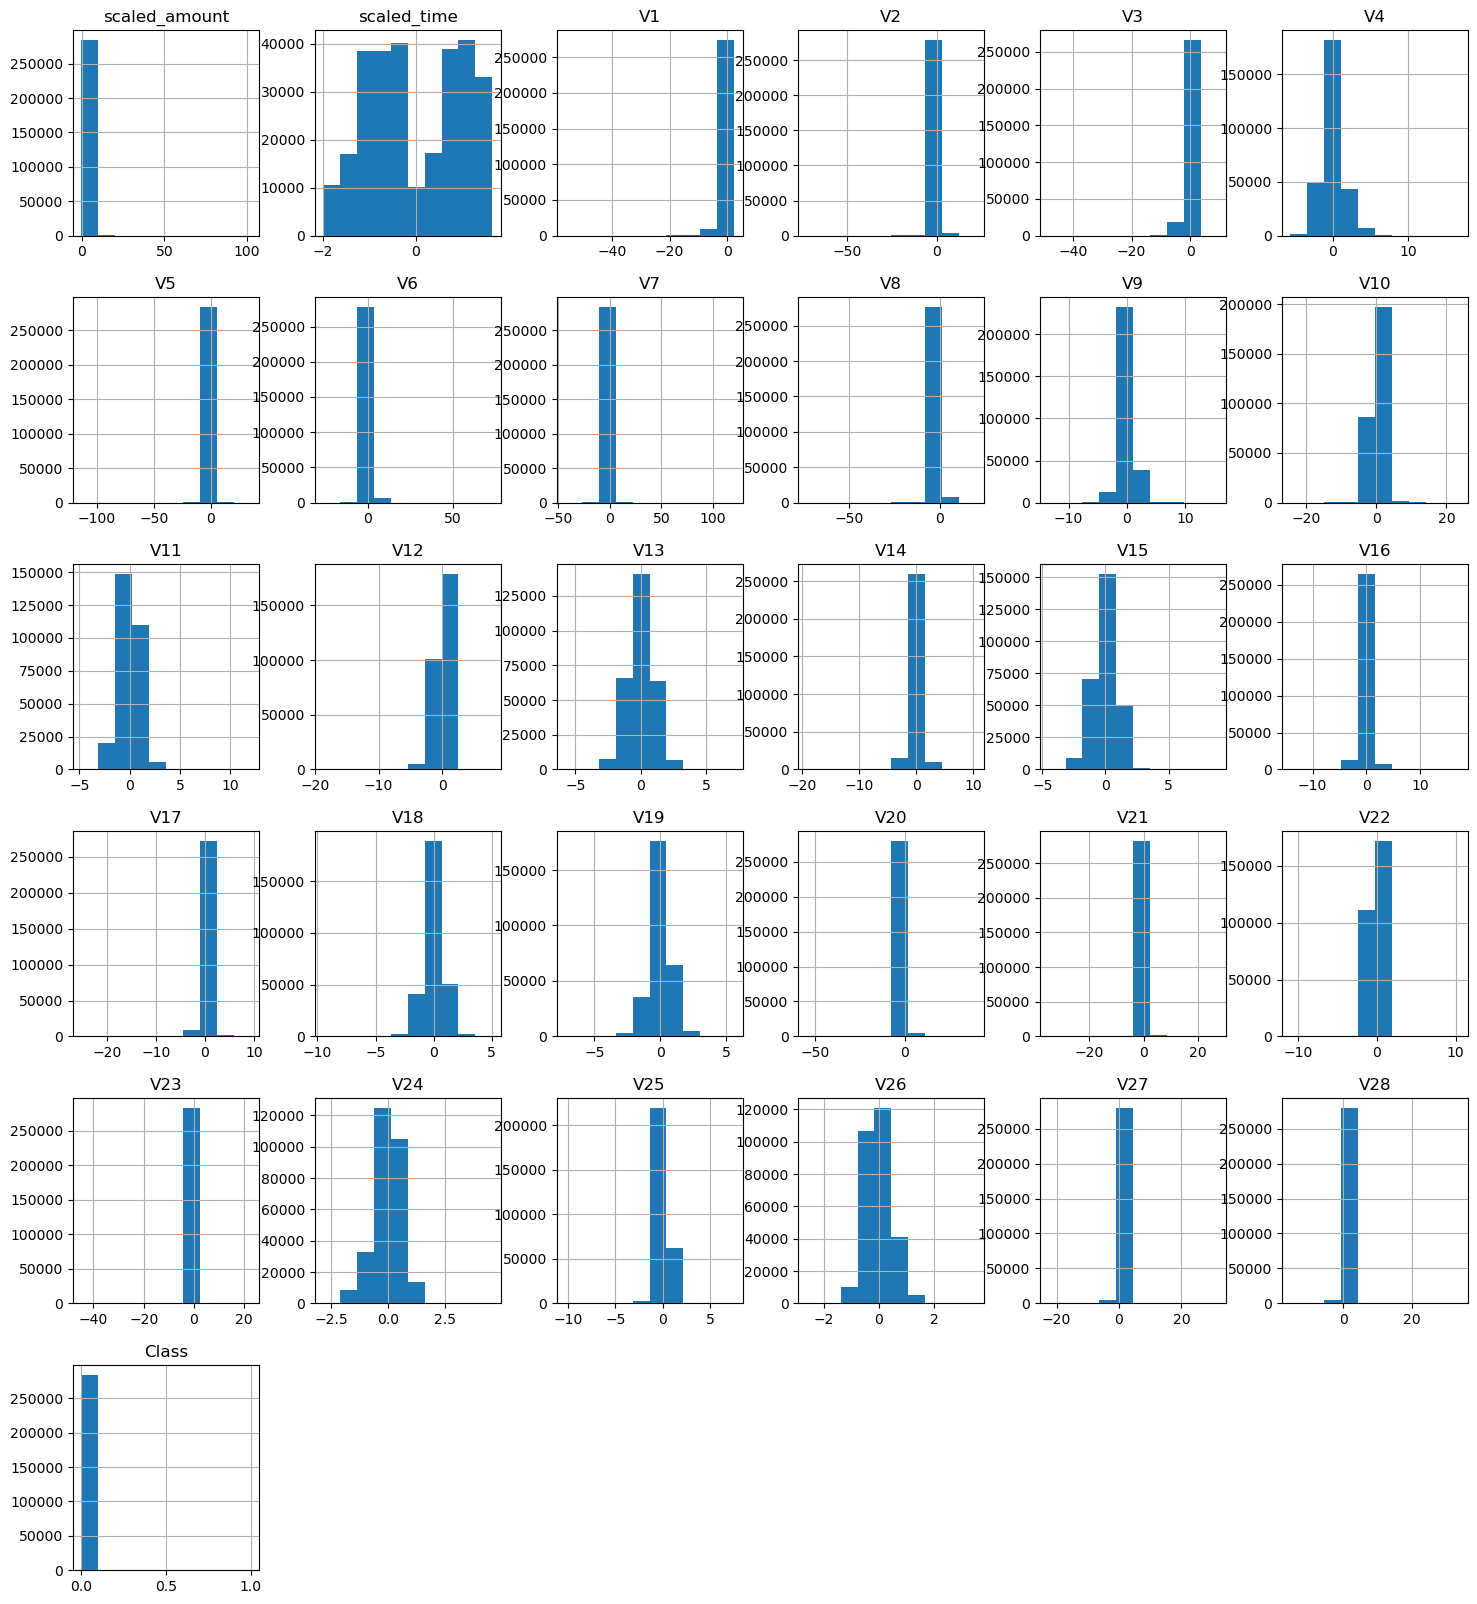

In [46]:
dataset.hist(figsize=(18,20))

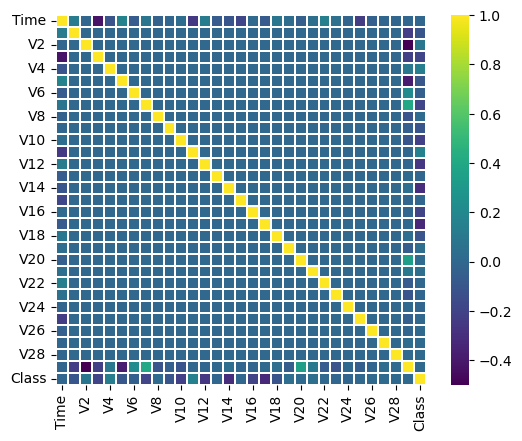

In [11]:
# fig = plt.figure(figsize = (20, 13))
sns.heatmap(dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

dataset['scaled_amount'] = stc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = stc.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Amount' , 'Time'] , axis = 1 , inplace = True )

scaled_amount = dataset['scaled_amount']
scaled_time   = dataset['scaled_time']

dataset.drop(['scaled_amount' , 'scaled_time'] , axis = 1 , inplace = True )

dataset.insert(0 , 'scaled_amount' , scaled_amount)
dataset.insert(1 , 'scaled_time' , scaled_time)

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
legit = dataset[dataset.Class==0]
fraud = dataset[dataset.Class==1]

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
#row-wise concat

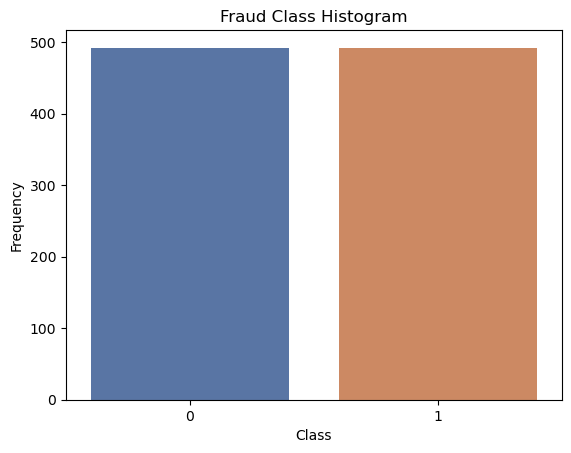

In [17]:
sns.countplot(x="Class", data=new_dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [18]:
new_dataset.shape

(984, 31)

In [19]:
new_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
55703,-0.233327,-1.005197,-0.100434,0.999388,0.978333,0.084569,0.903044,0.051828,1.037477,-0.345782,...,0.322517,-0.286111,-0.625676,-0.161310,-1.018536,-0.357317,0.169696,-0.049235,-0.076419,0
146426,0.319768,-0.149908,-2.142255,-2.495566,0.017188,0.361843,3.111955,-2.715876,0.167248,-0.399262,...,1.015283,0.490929,0.609442,0.596911,-0.126393,0.005884,-0.568614,-0.121494,0.037143,0
165643,0.005399,0.478944,-1.029898,0.102684,0.299500,-0.487868,1.909812,1.353638,0.734817,0.516963,...,0.212099,0.022261,-0.281251,-0.059843,-1.016838,0.502206,-0.103116,0.011163,0.048158,0
79068,-0.349671,-0.778466,-1.709404,-0.255060,0.966822,0.203584,0.841713,-0.947618,0.302863,0.037699,...,-0.463042,-0.410675,-0.572273,0.998464,-0.078041,0.088227,0.114827,0.257604,-0.097487,0
9735,-0.289460,-1.691727,1.115279,-0.245867,0.810010,0.123857,-0.522221,0.400852,-0.789015,0.301245,...,-0.221436,0.025504,0.300617,0.049303,-0.294763,-0.016858,1.077120,-0.069057,-0.013978,0


In [20]:
new_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 55703 to 281674
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  984 non-null    float64
 1   scaled_time    984 non-null    float64
 2   V1             984 non-null    float64
 3   V2             984 non-null    float64
 4   V3             984 non-null    float64
 5   V4             984 non-null    float64
 6   V5             984 non-null    float64
 7   V6             984 non-null    float64
 8   V7             984 non-null    float64
 9   V8             984 non-null    float64
 10  V9             984 non-null    float64
 11  V10            984 non-null    float64
 12  V11            984 non-null    float64
 13  V12            984 non-null    float64
 14  V13            984 non-null    float64
 15  V14            984 non-null    float64
 16  V15            984 non-null    float64
 17  V16            984 non-null    float64
 18  V17     

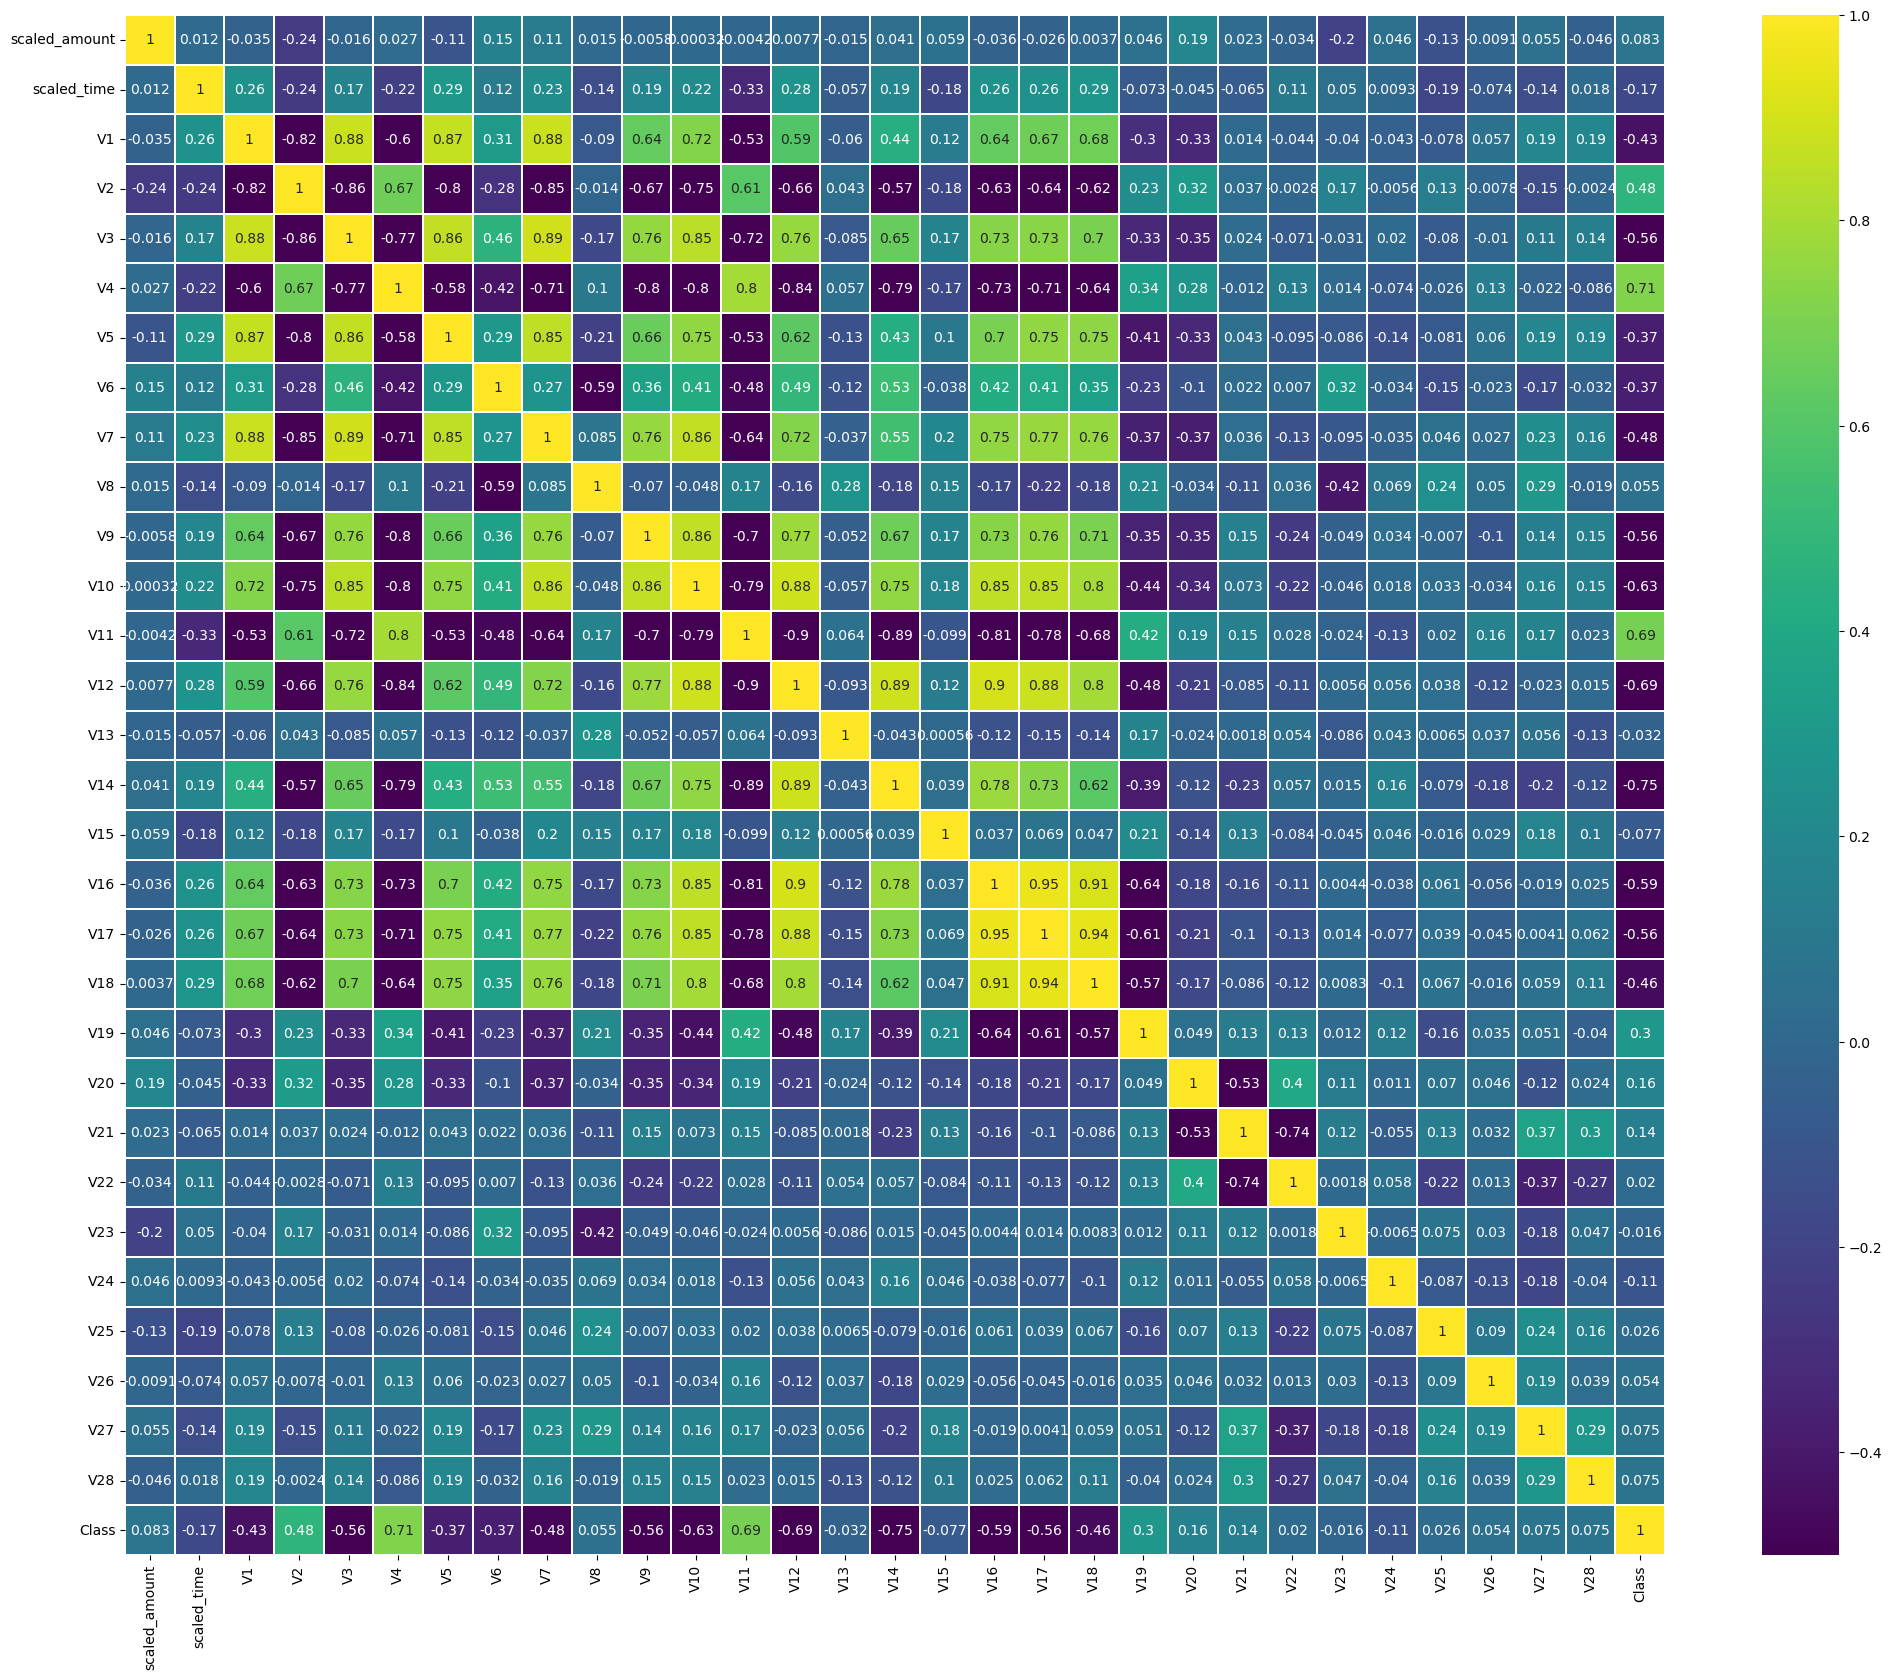

In [22]:
fig = plt.figure(figsize = (25, 20))
sns.heatmap(new_dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05, annot=True)
plt.show()

# Preparing the data

First, split the data into X_train, X_test, Y_train, Y_test to initiate the model building

In [24]:
X= new_dataset.drop(columns="Class",axis=1)
Y=new_dataset["Class"]

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

Note: When you set stratify=Y, it means that the train_test_split function will try to maintain the same proportion of classes in the target variable Y in both the training and testing sets as it was in the original dataset Y. This is particularly useful in cases of imbalanced datasets where one class may have significantly fewer examples than the other(s).

# Building the model

Here we are starting with the 1st Model **logistic Regression**, after this we will process 2nd Model and 3rd Model **Random Forest** | **Desion Tree** respectively

In [27]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Accuracy score :  0.9695431472081218
Model Precision: 0.99
Model Recall: 0.95
Model F1-Score: 0.97
Model ROC: 0.97 

              precision    recall  f1-score   support

       Valid       0.95      0.99      0.97        99
       Fraud       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197
 



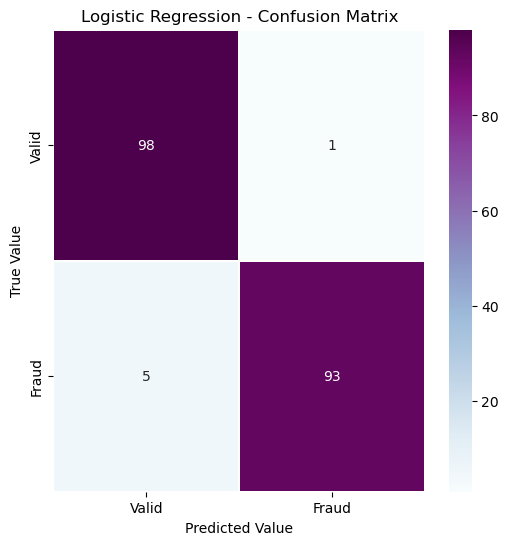

In [29]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Model 2 - Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model1=rfc.fit(X_train,Y_train)
y_pred=model1.predict(X_test)
accuracy_score(Y_test,y_pred)


0.9695431472081218

Model Precision: 0.99
Model Recall: 0.95
Model F1-Score: 0.97
Model ROC: 0.97 

              precision    recall  f1-score   support

       Valid       0.95      0.99      0.97        99
       Fraud       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197
 



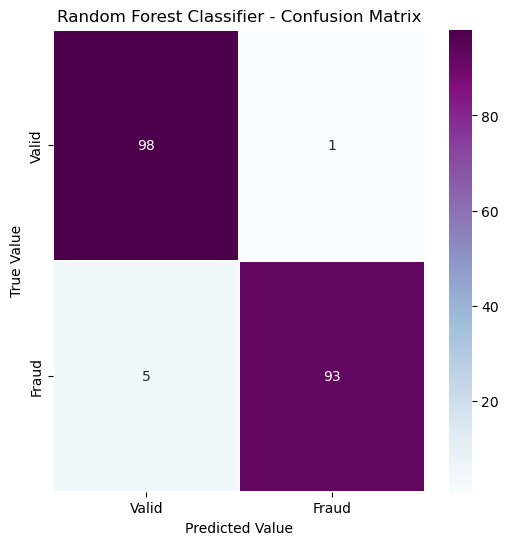

In [31]:
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Model 3 - Decision Tree

Model Precision: 0.85
Model Recall: 0.96
Model F1-Score: 0.9
Model ROC: 0.89 

              precision    recall  f1-score   support

       Valid       0.95      0.83      0.89        99
       Fraud       0.85      0.96      0.90        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197
 



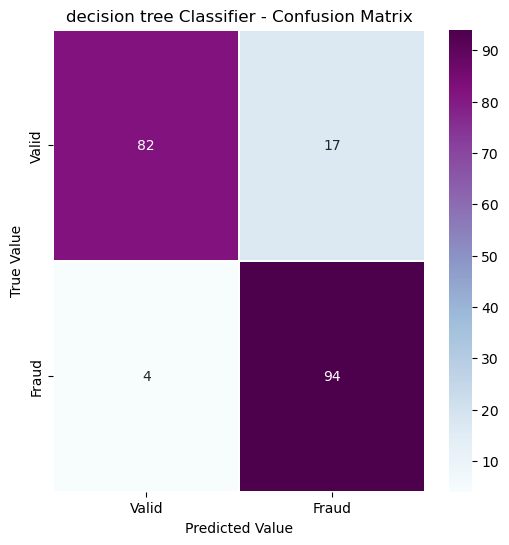

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model3=dt.fit(X_train,Y_train)
y_pred=model3.predict(X_test)
accuracy_score(Y_test,y_pred)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("decision tree Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# Conclusion

In this project, we trained and evaluated three machine learning models: Logistic Regression, Random Forest, and Decision Tree, for fraud detection.

Both Logistic Regression and Random Forest models demonstrated high accuracy, precision, recall, and F1-score, around 97%, indicating their robust performance in identifying fraudulent transactions.

However, the Decision Tree model, while achieving a reasonable accuracy of 89%, exhibited lower precision compared to the other models, suggesting a higher rate of false positives.

Overall, the Logistic Regression and Random Forest models outperformed the Decision Tree model in terms of precision and overall performance, making them suitable choices for fraud detection tasks in financial transactions.

These results indicate the effectiveness of machine learning algorithms in identifying and preventing fraudulent activities, offering promising avenues for enhancing security measures in financial systems. Further fine-tuning and exploration of ensemble methods could potentially enhance the performance of the models even more.